# Customer Shopping Trends in USA

**Komal Ghazanfar - Python for Data Analysts: Methods and Tools** <br>
**Date: December, 2023.**

This Python assignment involves exploring a dataset comprising 3,900 records, encompassing customer details and 
purchase behaviors. The dataset includes columns like Customer ID, age, gender, purchase specifics (item, category,amount),
as well as location, size, color,and season of purchase. It also incorporates factors like review ratings, subscription 
status, payment methods, and purchase frequency. 

The primary goal is to investigate four hypotheses: 
1. Gender and Purchase Behavior:
Investigated whether gender significantly impacts purchase behavior.

2. Seasonal Influence on Purchase Behavior:
Explored the relationship between seasons and purchase behavior.

3. Subscription Status and Purchase Behavior:
Analyzed if customers with subscription status exhibit different purchase behavior compared to non-subscribers.

4. Age Groups and Purchase Behavior:
Examined the correlation between age groups and purchase behavior.


By scrutinizing customer behavior and preferences, the assignment seeks to derive meaningful insights into purchasing 
trends and factors shaping consumer decisions which will enable Sapphire to align their marketing and product enhacement strategies to their consumers' liking.


Kaggle Link to Raw Data: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

## Environment Setup and Data Loading

In [162]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

# Configure to avoid unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

In [163]:
# Specify the path to the datasets
data_path = "./data/"

# Specify the filenames of the datasets
shopping_trends_filename = "shopping_trends.csv"

# Read the CSV files and create backup copies
shopping_trends_df_data = pd.read_csv(data_path + shopping_trends_filename)

# Create working copies of the dataframes for analysis
shopping_trends_df = shopping_trends_df_data.copy()


We are reading the CSV file 'Customer Shopping Trends'.

In [164]:
#Option to display all columns
pd.set_option('display.max_columns',None)
shopping_trends_df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
839,840,48,Male,Shirt,Clothing,31,Illinois,L,Teal,Spring,2.6,Yes,Cash,Free Shipping,Yes,Yes,10,Debit Card,Every 3 Months
1717,1718,29,Male,Hoodie,Clothing,50,Hawaii,L,Orange,Summer,2.9,No,Cash,Express,No,No,16,Debit Card,Bi-Weekly
321,322,41,Male,Sneakers,Footwear,36,Vermont,L,Orange,Summer,4.7,Yes,Credit Card,Free Shipping,Yes,Yes,48,Debit Card,Quarterly
3187,3188,67,Female,Blouse,Clothing,72,Texas,L,Indigo,Winter,3.2,No,Credit Card,Free Shipping,No,No,28,Debit Card,Weekly
2269,2270,49,Male,Skirt,Clothing,38,Kentucky,M,Yellow,Fall,4.4,No,Credit Card,Store Pickup,No,No,27,Credit Card,Annually


# Data Cleaning

In [165]:
# Let's check its structure
shopping_trends_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [166]:
categorical_columns = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']

# Convert object columns to categorical
for col in categorical_columns:
   shopping_trends_df[col] = shopping_trends_df[col].astype('category')



In [167]:
# Convert 'Subscription Status' column to boolean
shopping_trends_df['Subscription Status'] = shopping_trends_df['Subscription Status'].map({'Yes': True, 'No': False})

shopping_trends_df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,True,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,True,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,True,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,True,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,True,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Changing data types to optimize dataset performance.

In [168]:
# Let's check its structure again
shopping_trends_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer ID               3900 non-null   int64   
 1   Age                       3900 non-null   int64   
 2   Gender                    3900 non-null   category
 3   Item Purchased            3900 non-null   category
 4   Category                  3900 non-null   category
 5   Purchase Amount (USD)     3900 non-null   int64   
 6   Location                  3900 non-null   category
 7   Size                      3900 non-null   category
 8   Color                     3900 non-null   category
 9   Season                    3900 non-null   category
 10  Review Rating             3900 non-null   float64 
 11  Subscription Status       3900 non-null   category
 12  Payment Method            3900 non-null   category
 13  Shipping Type             3900 non-null   catego

In [169]:
#Checking for duplicates
shopping_trends_df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
3895    False
3896    False
3897    False
3898    False
3899    False
Length: 3900, dtype: bool

In [170]:
shopping_trends_df[shopping_trends_df.duplicated()]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases


In this case we have no duplicates.

In [171]:
shopping_trends_df.shape #dimension of dataframe

(3900, 19)

In [172]:
shopping_trends_df.drop_duplicates(inplace=True)
shopping_trends_df.shape 

(3900, 19)

There are no duplicates in this DataSet, however the above step demonstrates how to drop duplicates if needed.

## Missing Value Treatment

In [173]:
#Shows the na for each column
shopping_trends_df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

The code above checks for missing values in each column of the DataFrame and displays the count of these missing values. In this specific case, the output indicates that there are zero missing values in each column of the DataFrame.

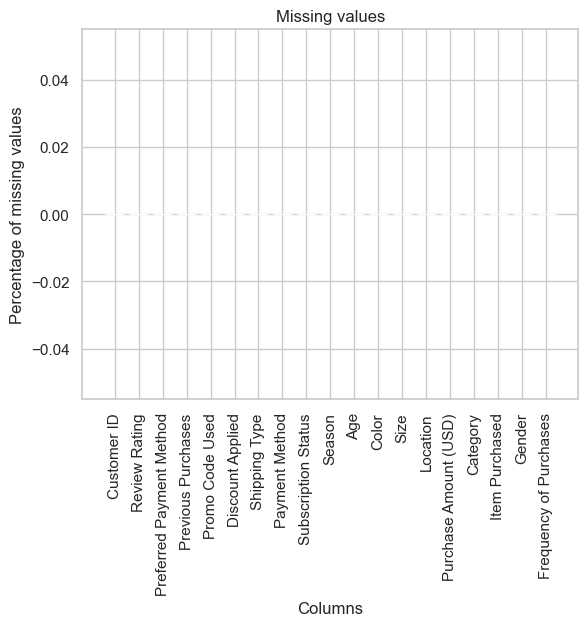

In [174]:
def visualize_null(dataframe,percentage=True):
    null_series=shopping_trends_df.isna().sum().sort_values(ascending=False)
    if percentage:
        null_series=null_series/len(dataframe)*100

    plt.bar(x=null_series.index,height=null_series.values)

    if percentage:
        plt.ylabel('Percentage of missing values')
    else:
        plt.ylabel('Amount of missing values')
    plt.title('Missing values')
    plt.xlabel('Columns')
    plt.xticks(rotation=90)
    plt.show()

visualize_null(shopping_trends_df)

The graph illustrates and confirms that the dataset has no missing values.

## Cap & Floor Treatment

This method trims outliers to predefined thresholds, thereby lessening their potentially distorting effects on the analysis. A "cap" refers to setting an upper limit on data points to reduce the impact of extremely high outliers, while a "floor" establishes a lower limit to address very low outliers. 

In [175]:
#Descriptive statistic for the numerical columns
shopping_trends_df[['Age','Purchase Amount (USD)','Review Rating', 'Previous Purchases']].describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


The minimum and maximum values of all the numerical values are coherent and a "Cap & Floor" treatment for outliers is not required in our dataset.

## Sanity Check of Data

This code will provide the count of payment methods used for each age group, items purchased for each gender, purchases made in each season, purchases in each season for different categories, preferred payment methods for both subscribers and non-subscribers, preferred payment methods and frequency for both subscribers and non-subscribers just to check the accuracy of the data.

In [176]:
# Grouping by 'Age' and counting the occurrences of each payment method
age_payment_counts = shopping_trends_df.groupby('Age')['Payment Method'].value_counts()

age_payment_counts

Age  Payment Method
18   Cash              16
     Bank Transfer     15
     Debit Card        13
     Credit Card        9
     PayPal             9
                       ..
70   Venmo             12
     PayPal            11
     Bank Transfer     11
     Credit Card       10
     Debit Card         6
Name: count, Length: 318, dtype: int64

In [177]:
# Counting the occurrences of each item purchased by gender
gender_item_counts = shopping_trends_df.groupby('Gender')['Item Purchased'].value_counts()

gender_item_counts


Gender  Item Purchased
Female  Blouse             66
        Sandals            59
        Shirt              59
        Handbag            58
        Socks              58
        Sunglasses         56
        Belt               55
        Jacket             54
        Dress              52
        Jewelry            52
        Hat                52
        Hoodie             51
        Sweater            50
        Boots              50
        Skirt              49
        Shoes              48
        Shorts             48
        Pants              48
        Coat               47
        T-shirt            46
        Scarf              45
        Sneakers           42
        Gloves             37
        Backpack           37
        Jeans              29
Male    Pants             123
        Jewelry           119
        Sweater           114
        Coat              114
        Dress             114
        Scarf             112
        Shirt             110
        Jacket   

In [178]:
# Counting the occurrences of purchases in each season
season_counts = shopping_trends_df['Season'].value_counts()

season_counts


Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

In [179]:
# Counting the occurrences of purchases in each season for different categories
season_category_counts = shopping_trends_df.groupby('Season')['Category'].value_counts()

season_category_counts


Season  Category   
Fall    Clothing       427
        Accessories    324
        Footwear       136
        Outerwear       88
Spring  Clothing       454
        Accessories    301
        Footwear       163
        Outerwear       81
Summer  Clothing       408
        Accessories    312
        Footwear       160
        Outerwear       75
Winter  Clothing       448
        Accessories    303
        Footwear       140
        Outerwear       80
Name: count, dtype: int64

In [180]:
# Counting the occurrences of preferred payment methods based on subscription status
payment_method_subscription_counts = shopping_trends_df.groupby('Subscription Status')['Preferred Payment Method'].value_counts()

payment_method_subscription_counts


Subscription Status  Preferred Payment Method
False                Cash                        497
                     PayPal                      497
                     Credit Card                 492
                     Venmo                       460
                     Bank Transfer               455
                     Debit Card                  446
True                 Debit Card                  190
                     PayPal                      180
                     Credit Card                 179
                     Venmo                       174
                     Cash                        173
                     Bank Transfer               157
Name: count, dtype: int64

In [181]:
# Counting the occurrences of frequency of purchases based on subscription status
frequency_subscription_counts = shopping_trends_df.groupby('Subscription Status')['Frequency of Purchases'].value_counts()

frequency_subscription_counts


Subscription Status  Frequency of Purchases
False                Every 3 Months            430
                     Quarterly                 423
                     Annually                  412
                     Bi-Weekly                 407
                     Monthly                   404
                     Fortnightly               389
                     Weekly                    382
True                 Annually                  160
                     Weekly                    157
                     Every 3 Months            154
                     Fortnightly               153
                     Monthly                   149
                     Bi-Weekly                 140
                     Quarterly                 140
Name: count, dtype: int64

The data looks healthy. We can make multiple observations from the above results. For example, the preferred payment method for most teenagers and young adults around 18-20 years of age is cash whereas the preferred payment method for people around age 70+ is Venmo.

## Drop Columns

For the hypotheses related to Age and Payment Method Correlation, Gender-Based Preferences, Seasonal Trends in Purchases, and Subscription Status and Purchase Behavior, certain columns might not directly contribute to these analyses, therefore we will drop them.

In [182]:
#Dropping unneccesary columns:
columns_to_drop = ['Customer ID', 'Location', 'Size', 'Color', 'Review Rating']
shopping_trends_df.drop(columns=columns_to_drop, inplace=True)


Now let's check the database again to make sure it is clean with the required variables in the correct format.

In [183]:
shopping_trends_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       3900 non-null   int64   
 1   Gender                    3900 non-null   category
 2   Item Purchased            3900 non-null   category
 3   Category                  3900 non-null   category
 4   Purchase Amount (USD)     3900 non-null   int64   
 5   Season                    3900 non-null   category
 6   Subscription Status       3900 non-null   category
 7   Payment Method            3900 non-null   category
 8   Shipping Type             3900 non-null   category
 9   Discount Applied          3900 non-null   category
 10  Promo Code Used           3900 non-null   category
 11  Previous Purchases        3900 non-null   int64   
 12  Preferred Payment Method  3900 non-null   category
 13  Frequency of Purchases    3900 non-null   catego

# Analysis

## Hypothesis 1 | Are variables "Age" and "Payment Method" correlated?

Now that we have finished cleaning, we will create the views for data analysis. First, we will construct a descriptive chart for Age and Value Count for Payment Method.Then we will create a graph with age bins to analyze payment method trends within each age group and lastly conduct an ANOVA test to statistically analyze whether there is a statistically significant relationship between both variables. It is important to note we cannot identify the correlation for both variables because it is not ideal to compare categorical data with numerical data. 

Understanding our customer base's preferred payment methods is integral to enhancing their shopping experience. By analyzing the dataset, we aim to discern the prevalent payment choices—be it Venmo, PayPal, Credit Card, Debit Card, or others. This understanding will guide us in tailoring specific discount offers corresponding to these preferred methods, fostering customer loyalty. Additionally, exploring potential partnerships or negotiating deals with payment platforms like Venmo or PayPal can streamline transactions, reduce costs, and offer added convenience to our clientele, aligning with Sapphire's commitment to optimizing the shopping journey.

In [184]:
# Descriptive statistics for the 'Age' column
shopping_trends_df['Age'].describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

In [185]:
# Value counts for 'Payment Method'
shopping_trends_df['Payment Method'].value_counts()


Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

In [186]:
# Create a new column 'Payment_Counts' using map function
shopping_trends_df['Payment_Counts'] = shopping_trends_df['Payment Method'].map(payment_counts)

payment_counts

Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

In [187]:
# Display 'Age', 'Payment Method', and 'Payment_Counts' columns
desired_columns = ['Age', 'Payment Method']
selected_data = shopping_trends_df[desired_columns]

selected_data



,Age,Payment Method
0,55,Credit Card
1,19,Bank Transfer
2,50,Cash
3,21,PayPal
4,45,Cash
...,...,...
3895,40,Cash
3896,52,PayPal
3897,46,Credit Card
3898,44,PayPal


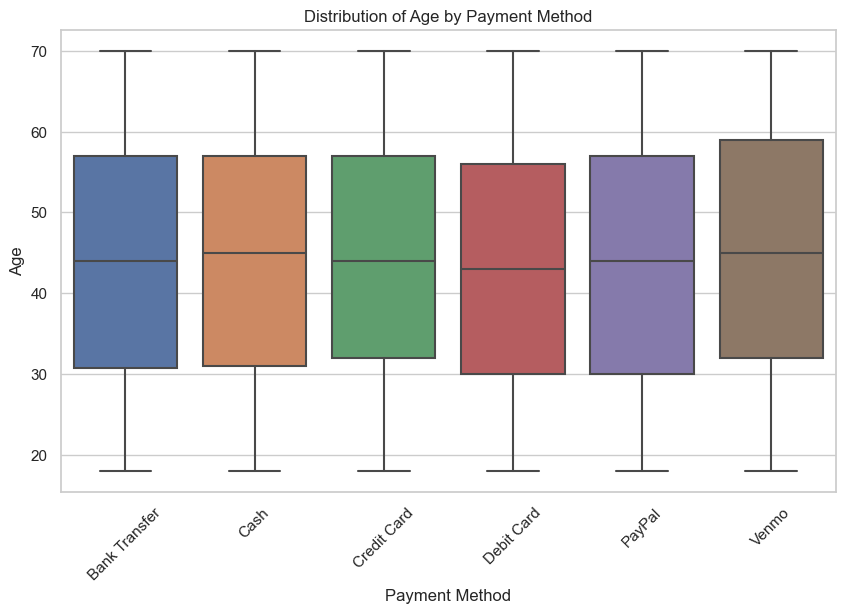

In [188]:
import seaborn as sns

#Create a box plot to visualize the distribution of ages for each payment method
plt.figure(figsize=(10, 6))
sns.boxplot(x='Payment Method', y='Age', data=shopping_trends_df)
plt.title('Distribution of Age by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


The box plot showcasing different methods of payment against age, ranges between 18 years to 70 years, which indicates an intriguing demographic distribution across payment preferences.Primarily, the central tendency of ages across all payment methods concentrated within the 40-50 range implies a uniformity or similarity in the age demographic of individuals utilizing these payment modes.This analysis can aid in understanding user behavior, targeted marketing strategies, and tailoring payment services to specific age demographics.

<Figure size 1200x800 with 0 Axes>

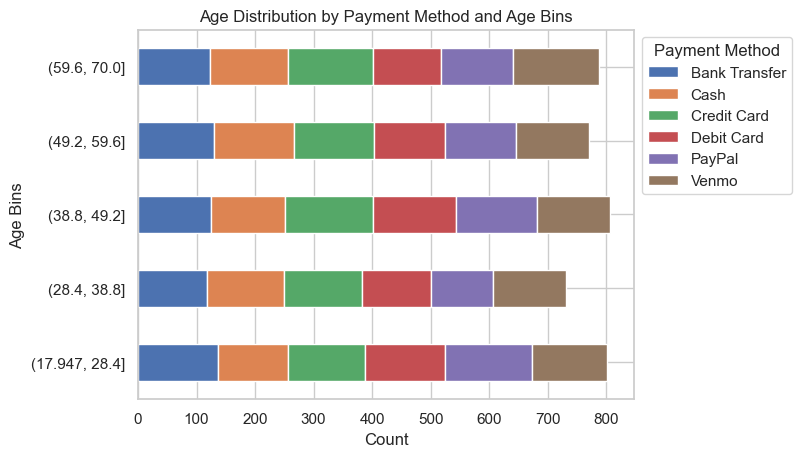

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the minimum and maximum ages
min_age = 18
max_age = 70

# Define the number of bins
num_bins = 5  # You can adjust this number as needed

# Calculate bin edges within the specified range
bin_edges = pd.cut(shopping_trends_df['Age'], bins=num_bins, include_lowest=True, retbins=True)[1]

# Create bins based on the calculated edges and convert them to string representations
bins = pd.cut(shopping_trends_df['Age'], bins=bin_edges, include_lowest=True).astype(str)

# Assign the age bins to a new column in the DataFrame
shopping_trends_df['Age Bins'] = bins

# Group data by 'Payment Method' and 'Age Bins' and count occurrences
grouped_data = shopping_trends_df.groupby(['Age Bins', 'Payment Method']).size().unstack()

# Create a grouped bar chart with age ranges on the y-axis
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='barh', stacked=True)
plt.title('Age Distribution by Payment Method and Age Bins')
plt.xlabel('Count')
plt.ylabel('Age Bins')
plt.legend(title='Payment Method', bbox_to_anchor=(1, 1), loc='upper left')  # Show legend outside the plot
plt.show()


Now we can see the preferences for each payment method within each age bin. This helps identify which method of payment is popular among each age group.Though the difference is not stark, we can see age 18 to 30 prefer Paypal more. Whereas, customers between the ages of 30-40 prefer Paypal less.

In [190]:
from scipy.stats import f_oneway

# Group age data by payment method
payment_methods = shopping_trends_df['Payment Method'].unique()
data = {method: shopping_trends_df[shopping_trends_df['Payment Method'] == method]['Age'] for method in payment_methods}

# Perform ANOVA test
f_stat, p_value = f_oneway(*data.values())

# Print results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


F-statistic: 1.1499821808774593
P-value: 0.33152906980033986


Hypothesis 1 was related to exploring the correlation between age and payment methods, aiming to investigate whether there exists a relationship between a customer's age and their preferred payment method.
The ANOVA test revealed an F-statistic close to 1, indicating similarity in age variation across different payment methods and within groups. The associated p-value of 0.33 suggests insufficient evidence to reject the null hypothesis. Consequently, these results do not support significant differences in mean ages among various payment methods. Thus, based on this analysis, age does not seem to play a statistically significant role in influencing the choice of payment method within the observed population and we reject the null hypothesis.

## Hypothesis 2 | Do Customer Shopping Trends in the U.S indicate Gender Based Preferences?

In [191]:
# Understand gender distribution in the dataset
gender_distribution = shopping_trends_df['Gender'].value_counts()
"Gender Distribution:\n", gender_distribution

('Gender Distribution:\n',
 Gender
 Male      2652
 Female    1248
 Name: count, dtype: int64)

In [192]:
# Explore unique values in preference-related columns
preferred_categories = shopping_trends_df['Category'].unique()
"Unique Categories:", preferred_categories

('Unique Categories:',
 ['Clothing', 'Footwear', 'Outerwear', 'Accessories']
 Categories (4, object): ['Accessories', 'Clothing', 'Footwear', 'Outerwear'])

In [193]:
preferred_items = shopping_trends_df['Item Purchased'].unique()
"Unique Items Purchased:", preferred_items

('Unique Items Purchased:',
 ['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', ..., 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves']
 Length: 25
 Categories (25, object): ['Backpack', 'Belt', 'Blouse', 'Boots', ..., 'Socks', 'Sunglasses', 'Sweater', 'T-shirt'])

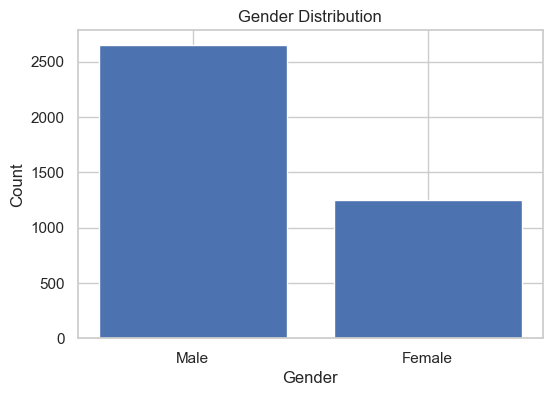

In [194]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize gender distribution
plt.figure(figsize=(6, 4))
plt.bar(gender_distribution.index, gender_distribution.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In our analysis of gender-based preferences in purchasing behavior, a noteworthy observation emerged from the bar graph: men exhibit a higher count in items purchased compared to women. This data insight challenges certain presumptions or stereotypes regarding shopping behaviors between genders and prompts a deeper exploration into the nuances of shopping patterns and preferences among men and women.The disparity in item count between genders also sparks curiosity regarding the types of items being purchased. Let's delve deeper into our analysis.

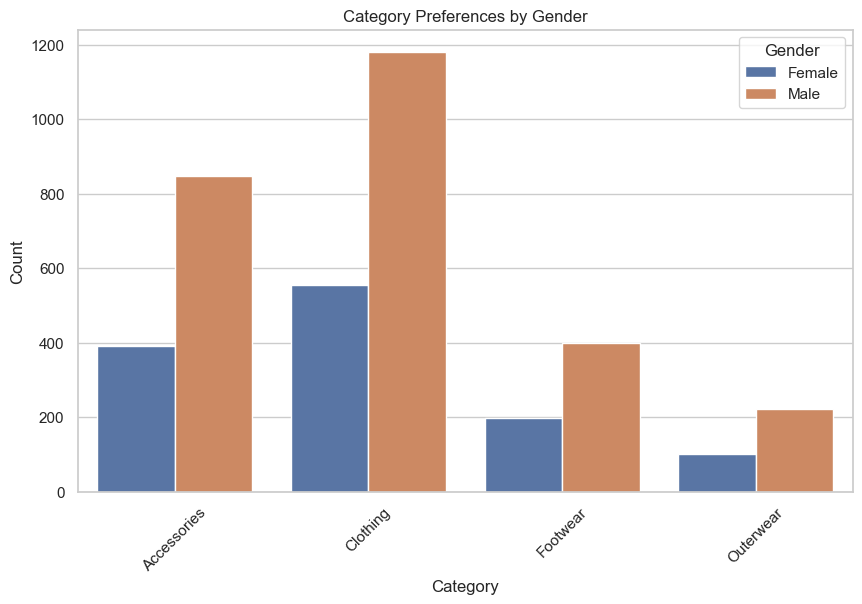

In [195]:
# Create visualizations to compare preferences between genders (e.g., 'Category' or 'Item Purchased')

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='Gender', data=shopping_trends_df)
plt.title('Category Preferences by Gender')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


By delving deeper into the specific preferences, product categories, and spending behaviors associated with each gender, we aim to gain a more comprehensive understanding of gender-based shopping patterns.This graph unveils an intriguing gender-based disparity in spending behaviors, specifically highlighting a notable inclination of male customers towards allocating more of their budget to clothing and accessories compared to females. Additionally, the data illustrates an overarching trend of higher spending across all categories by male customers in comparison to their female counterparts.

In [196]:
from scipy.stats import chi2_contingency

# Creating a contingency table for analysis
contingency_table = pd.crosstab(shopping_trends_df['Gender'], shopping_trends_df['Category'])

# Performing the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)
# Interpret the results based on the obtained p-value


Chi-square statistic: 0.5984208314833445
P-value: 0.8967937925861854


Chi-square Statistic: The computed value of approximately 0.598 suggests the extent of deviation between the observed and expected frequencies.A high p-value 0.89 suggests weak evidence against the null hypothesis.
   

By failing to reject the null hypothesis, our analysis suggests that, based on the current dataset and the statistical test performed, there's insufficient evidence to assert a meaningful relationship or dependency between the categories of items purchased ('Category') and the gender of the customers.

While our findings present an absence of a statistically significant association, it's important to acknowledge the limitations of this analysis. The non-rejection of the null hypothesis in this context doesn't completely dismiss the possibility of an association; rather, it suggests that the evidence within the dataset analyzed doesn't strongly support such a relationship.

## Hypothesis 3 | Is there a Seasonal Trend in Purchases?

In [197]:
# Grouping by Season
seasonal_grouped = shopping_trends_df.groupby('Season')


In [198]:
# Aggregating Purchase Metrics together
seasonal_purchase_data = seasonal_grouped.agg({
    'Purchase Amount (USD)': 'sum',
    'Previous Purchases': 'mean'  # Add more metrics as needed
}).reset_index()

seasonal_purchase_data

,Season,Purchase Amount (USD),Previous Purchases
0,Fall,60018,24.970256
1,Spring,58679,25.116116
2,Summer,55777,25.408377
3,Winter,58607,25.920700


In [199]:
# Display unique values in the 'Category' column
category_values = shopping_trends_df['Category'].unique()
category_values

['Clothing', 'Footwear', 'Outerwear', 'Accessories']
Categories (4, object): ['Accessories', 'Clothing', 'Footwear', 'Outerwear']

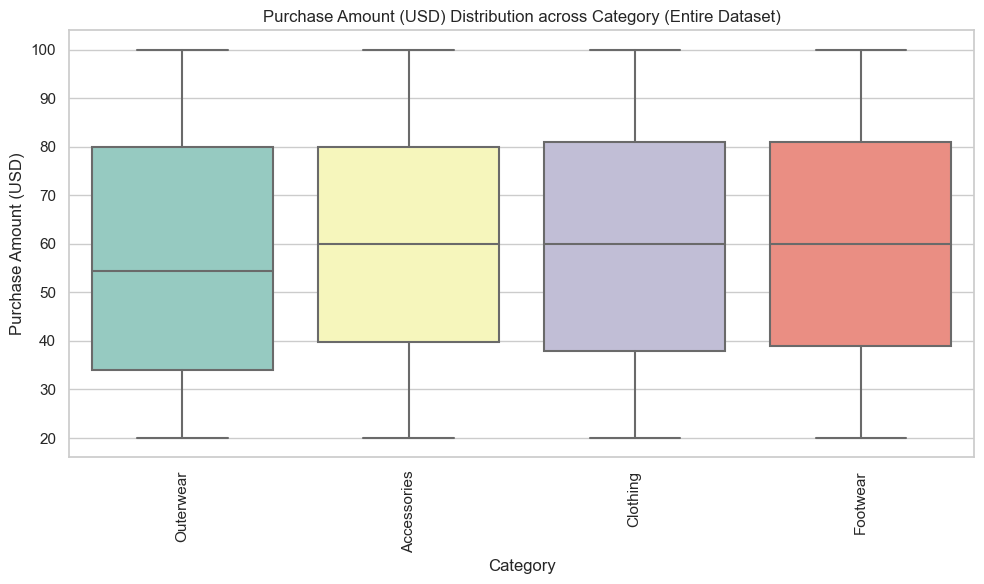

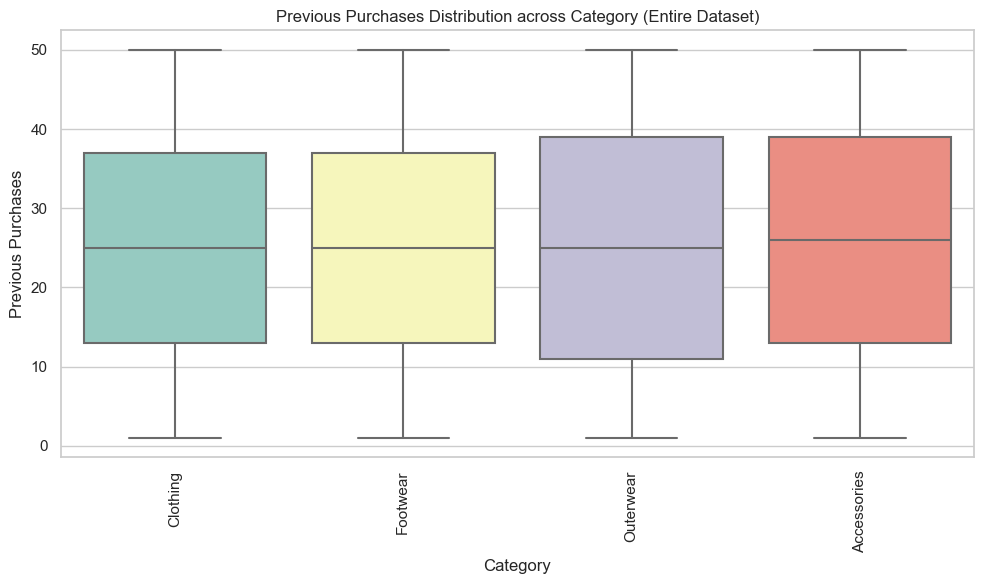

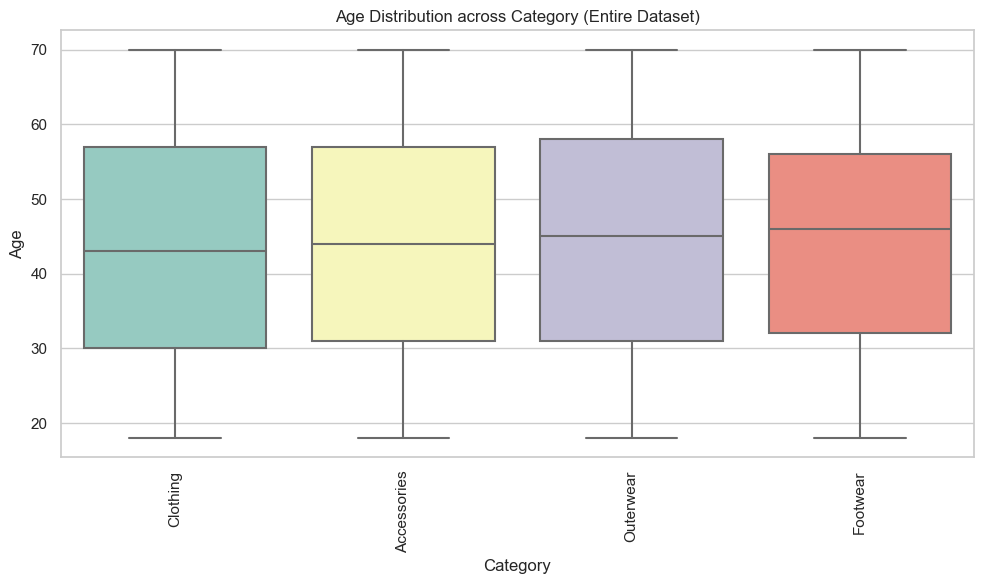

In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_sorted_boxplots(df, attribute, category, title_part, figsize=(10, 6)):
    # Filter the dataframe for specific values in the category column
    filtered_df = df[df[category].isin(['Accessories', 'Clothing', 'Footwear', 'Outerwear'])]
    
    # Calculate the median values for each category and sort
    median_values = filtered_df.groupby(category)[attribute].median().sort_values()
    sorted_categories = median_values.index.tolist()

    # Create the boxplot sorted by median values of the attribute within categories
    plt.figure(figsize=figsize)
    sns.boxplot(x=category, y=attribute, data=filtered_df, order=sorted_categories, palette='Set3')
    plt.title(f'{attribute} Distribution across {category} ({title_part})')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


attributes = ['Purchase Amount (USD)', 'Previous Purchases', 'Age'] 
category = 'Category'  

for attr in attributes:
    create_sorted_boxplots(shopping_trends_df, attr, category, 'Entire Dataset')


In [201]:
#Descriptive statistic
shopping_trends_df[['Season','Purchase Amount (USD)', 'Previous Purchases']].describe()

,Purchase Amount (USD),Previous Purchases
count,3900.000000,3900.000000
mean,59.764359,25.351538
std,23.685392,14.447125
min,20.000000,1.000000
25%,39.000000,13.000000
50%,60.000000,25.000000
75%,81.000000,38.000000
max,100.000000,50.000000


The purchase amounts seem evenly distributed across the range from 20 to 100 USD, with a fairly uniform count of 3900 for each value. This suggests a diverse range of purchase values rather than a skewed distribution towards specific amounts.

The mean purchase amount is approximately 59.76 USD, indicating that the average spending of customers falls around this value.
The standard deviation of 23.69 USD suggests a moderate level of variation around the mean. This could imply that while the average spending is around 60 USD, there's some diversity in how much customers spend.

Similar to purchase amounts, the distribution of previous purchases appears fairly uniform, ranging from 1 to 50.
On average, customers have made around 25.35 previous purchases. This suggests a moderate level of engagement, with customers making several purchases before the recorded transactions.

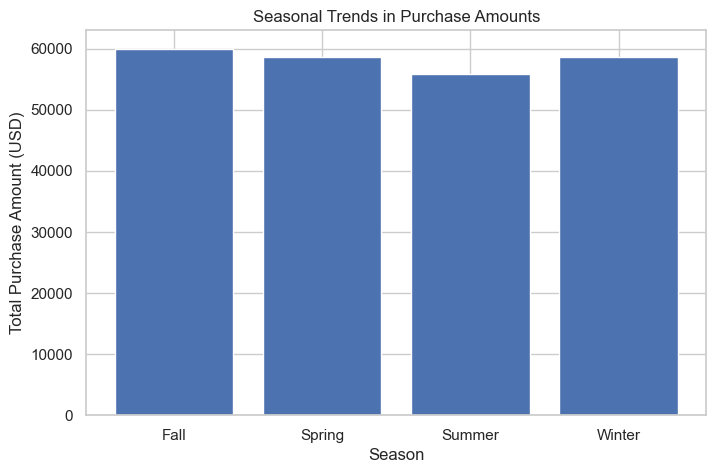

In [202]:
# Grouping by Season and aggregating purchase metrics
seasonal_purchase_data = shopping_trends_df.groupby('Season').agg({
    'Purchase Amount (USD)': 'sum',
    'Previous Purchases': 'mean'  
}).reset_index()

# Visualizing Seasonal Trends 
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(seasonal_purchase_data['Season'], seasonal_purchase_data['Purchase Amount (USD)'])
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Seasonal Trends in Purchase Amounts')
plt.show()


The data presents varying purchase amounts across different seasons, with Fall and Winter showing higher spending compared to Spring and Summer. Among the listed seasons, Fall records the highest purchase amount of 60,018 USD, followed closely by Winter at 58,607 USD.Spring follows with a slightly lower purchase amount of 58,679 USD, while Summer shows a comparatively lower purchase amount at 55,777 USD.


Fall and Winter showcase higher purchase amounts compared to Spring and Summer, indicating a potential trend of increased consumer spending during colder seasons. This aligns with typical consumer behavior, where expenditures might rise during holiday seasons, colder weather, or specific festivities.
To gain a more robust understanding of seasonal purchasing patterns, analyzing trends over multiple years, incorporating more granular data, or considering additional factors like promotional events, product launches, or economic factors might offer deeper insights into seasonal variations in consumer spending.



In [203]:
# Create a pivot table for heatmap
pivot_seasonal_data = seasonal_purchase_data.pivot_table(index='Season', values=['Purchase Amount (USD)', 'Previous Purchases'])
pivot_seasonal_data


,Previous Purchases,Purchase Amount (USD)
Season,,
Fall,24.970256,60018
Spring,25.116116,58679
Summer,25.408377,55777
Winter,25.920700,58607


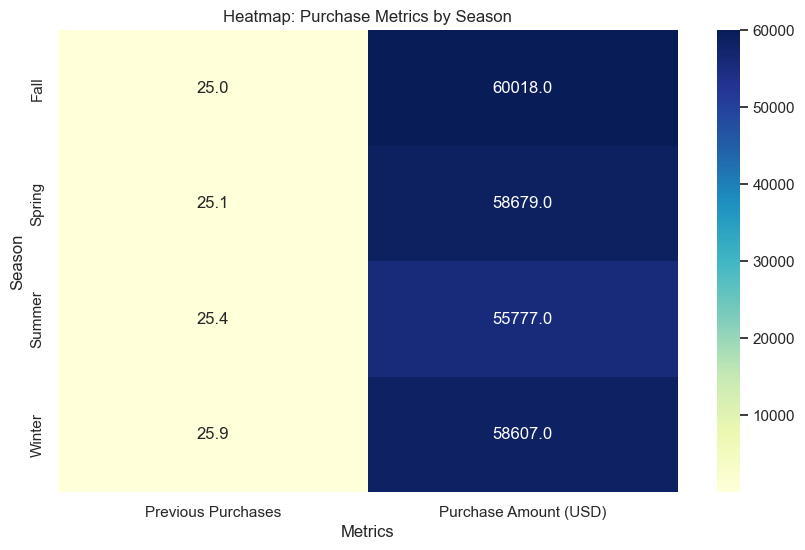

In [204]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_seasonal_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Heatmap: Purchase Metrics by Season')
plt.xlabel('Metrics')
plt.ylabel('Season')
plt.show()



Seasonal Patterns: The heatmap demonstrates consistent 'Previous Purchases' averages across seasons, with Winter showing marginally higher values. However, variations in 'Purchase Amount (USD)' indicate differences in spending across the seasons, with Fall and Winter recording higher expenditures compared to Spring and Summer.

No Strong Correlation: The heatmap doesn't explicitly reveal a strong correlation between 'Previous Purchases' and 'Purchase Amount (USD)'.

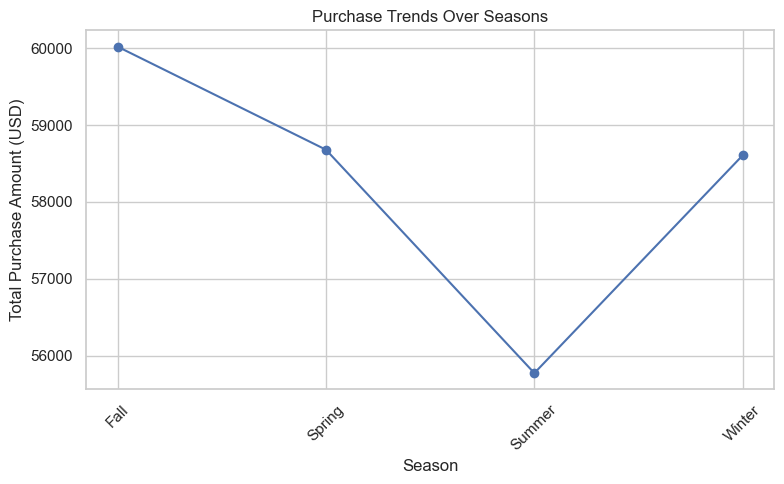

In [205]:
# Sorting data for line plot
sorted_seasonal_data = seasonal_purchase_data.sort_values('Season')

# Line plot
plt.figure(figsize=(8, 5))
plt.plot(sorted_seasonal_data['Season'], sorted_seasonal_data['Purchase Amount (USD)'], marker='o')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Purchase Trends Over Seasons')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


The above visualizations provide alternative ways to represent seasonal trends in purchases, offering a broader perspective on how purchase metrics vary across different seasons. However, the above line graph provides a much more clearer picture of the change in spending patterns by seasons, showcasing a slight dip in Summer. The trend of potentially lower spending during the summer months could be attributed to several factors.During summer, people often engage in outdoor activities, vacations, and holidays, which might shift their spending priorities. They might allocate more funds towards travel, leisure, and experiences rather than retail purchases.Hence, warmer weather might lead to different consumer behavior. People might prefer to spend time outside, reducing indoor shopping or online purchases. Economic fluctuations or uncertainties can also influence consumer confidence and spending patterns during different seasons.

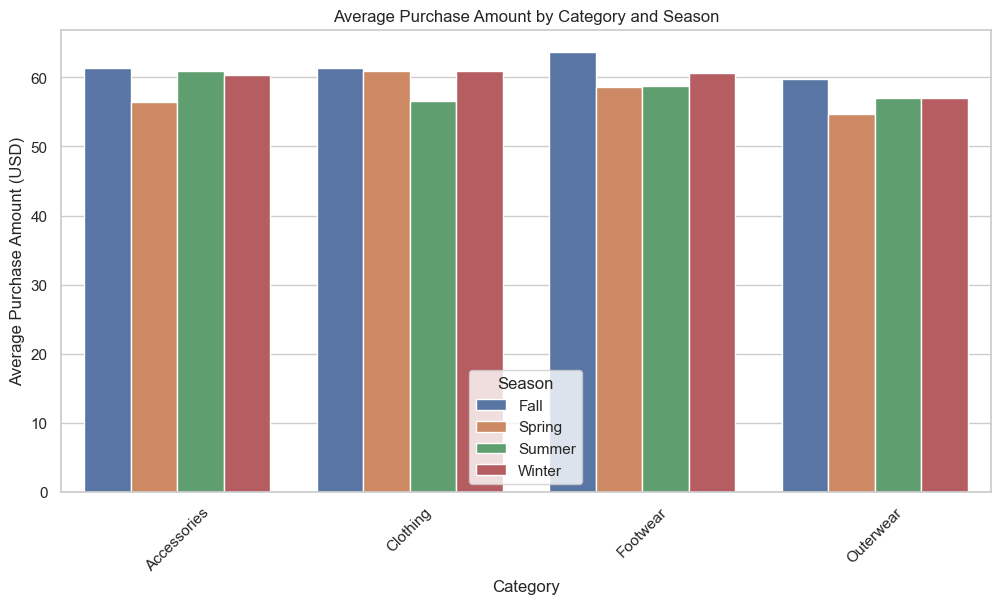

In [206]:
# Group data by 'Category' and 'Season', calculate average purchase amount
category_season_avg = shopping_trends_df.groupby(['Category', 'Season'])['Purchase Amount (USD)'].mean().reset_index()

# Visualize using a seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Purchase Amount (USD)', hue='Season', data=category_season_avg)
plt.title('Average Purchase Amount by Category and Season')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.show()


This grouping enables businesses to tailor their marketing strategies more effectively. For instance, it helps identify which product categories perform better in certain seasons, allowing for targeted promotions or seasonal campaigns to maximize sales.Understanding seasonal variations in product category preferences helps in better managing inventory. Businesses can adjust stock levels and product assortments based on anticipated demand fluctuations during different seasons for various categories. It can also help businesses in recognizing if certain product categories have consistent demand across seasons or if specific categories experience seasonal spikes in sales.

## T-Test:

Analysis for Purchase Amount (USD) between Summer and Winter:
T-statistic: -1.825
P-value: 0.068
There is not enough evidence to claim that the means are different.

----------------------------------------------



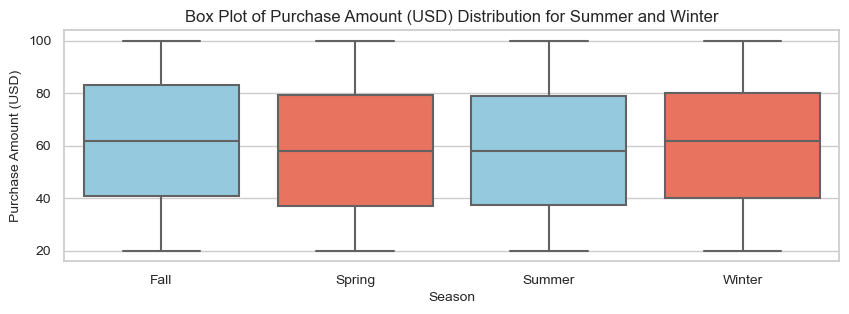

Analysis for Purchase Amount (USD) between Summer and Spring:
T-statistic: -0.310
P-value: 0.757
There is not enough evidence to claim that the means are different.

----------------------------------------------



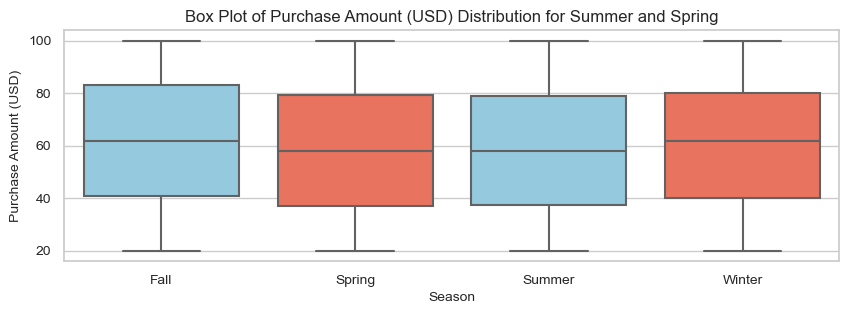

Analysis for Purchase Amount (USD) between Summer and Fall:
T-statistic: -2.932
P-value: 0.003
There is a statistically significant difference in the means.

----------------------------------------------



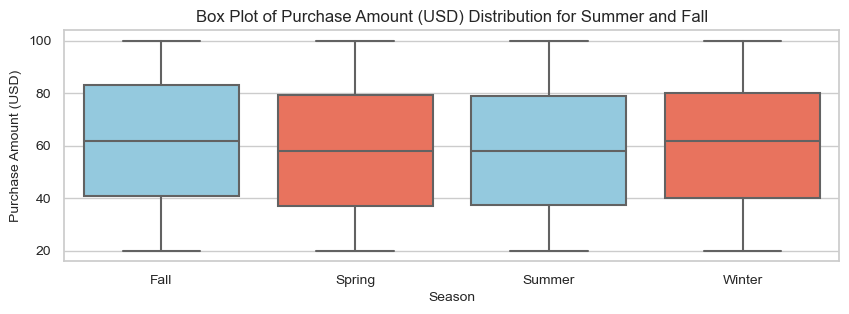

Analysis for Purchase Amount (USD) between Winter and Summer:
T-statistic: 1.825
P-value: 0.068
There is not enough evidence to claim that the means are different.

----------------------------------------------



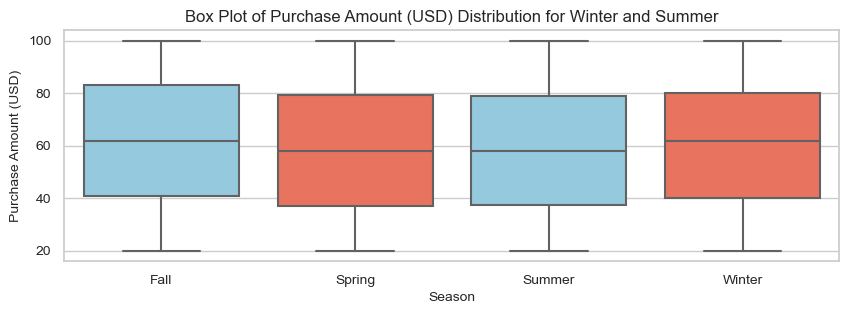

Analysis for Purchase Amount (USD) between Winter and Spring:
T-statistic: 1.516
P-value: 0.130
There is not enough evidence to claim that the means are different.

----------------------------------------------



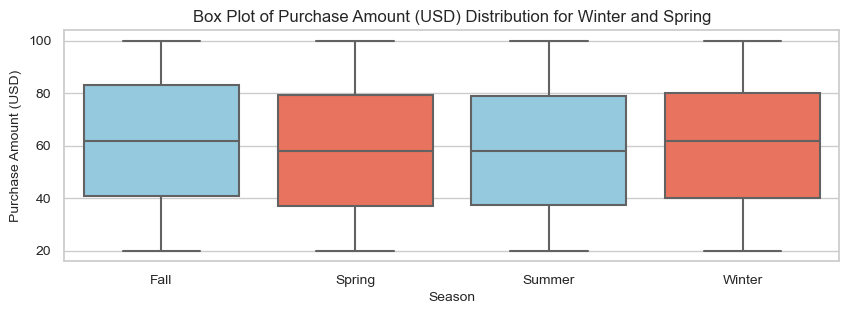

Analysis for Purchase Amount (USD) between Winter and Fall:
T-statistic: -1.121
P-value: 0.263
There is not enough evidence to claim that the means are different.

----------------------------------------------



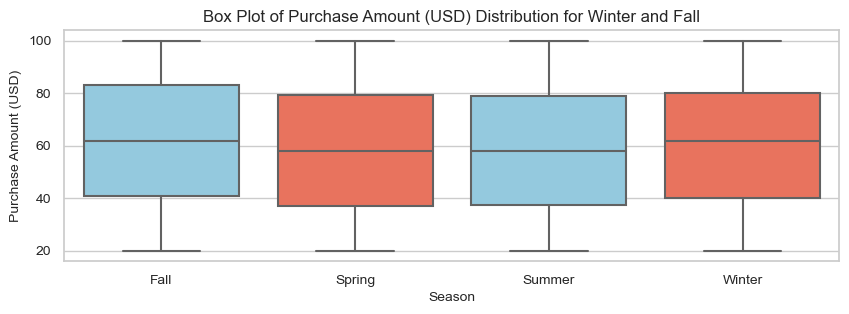

Analysis for Purchase Amount (USD) between Spring and Summer:
T-statistic: 0.310
P-value: 0.757
There is not enough evidence to claim that the means are different.

----------------------------------------------



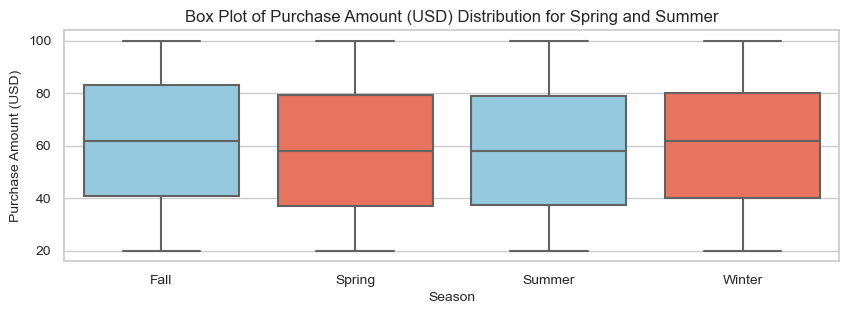

Analysis for Purchase Amount (USD) between Spring and Winter:
T-statistic: -1.516
P-value: 0.130
There is not enough evidence to claim that the means are different.

----------------------------------------------



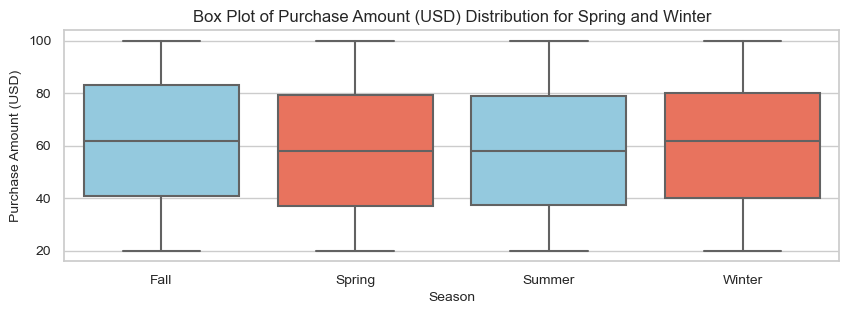

Analysis for Purchase Amount (USD) between Spring and Fall:
T-statistic: -2.627
P-value: 0.009
There is a statistically significant difference in the means.

----------------------------------------------



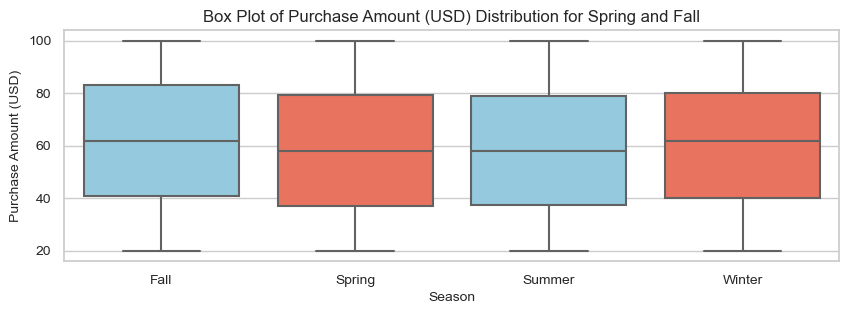

Analysis for Purchase Amount (USD) between Fall and Summer:
T-statistic: 2.932
P-value: 0.003
There is a statistically significant difference in the means.

----------------------------------------------



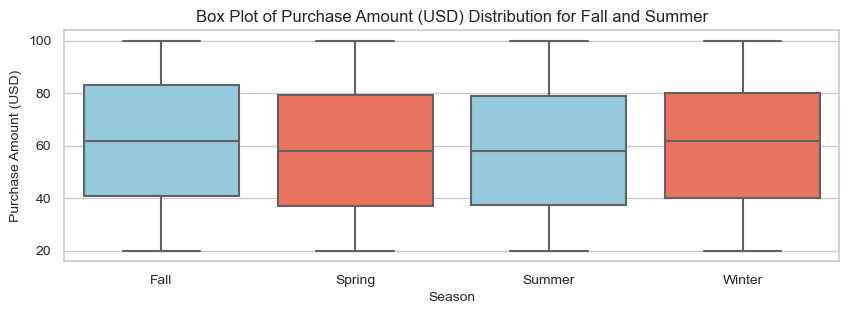

Analysis for Purchase Amount (USD) between Fall and Winter:
T-statistic: 1.121
P-value: 0.263
There is not enough evidence to claim that the means are different.

----------------------------------------------



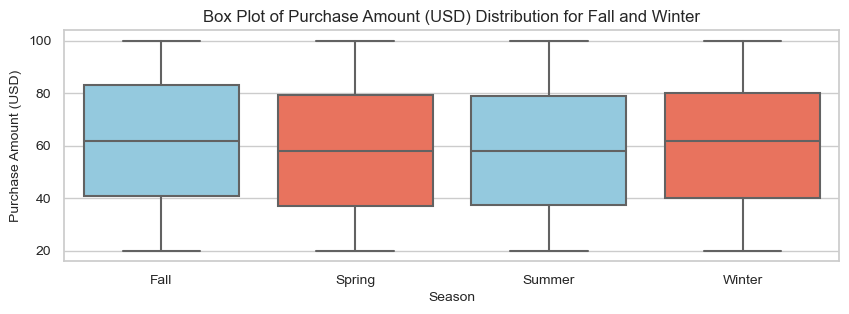

Analysis for Purchase Amount (USD) between Fall and Spring:
T-statistic: 2.627
P-value: 0.009
There is a statistically significant difference in the means.

----------------------------------------------



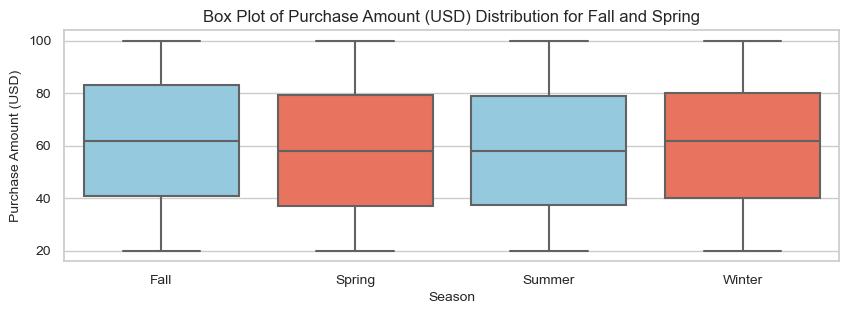

Analysis for Previous Purchases between Summer and Winter:
T-statistic: -0.773
P-value: 0.440
There is not enough evidence to claim that the means are different.

----------------------------------------------



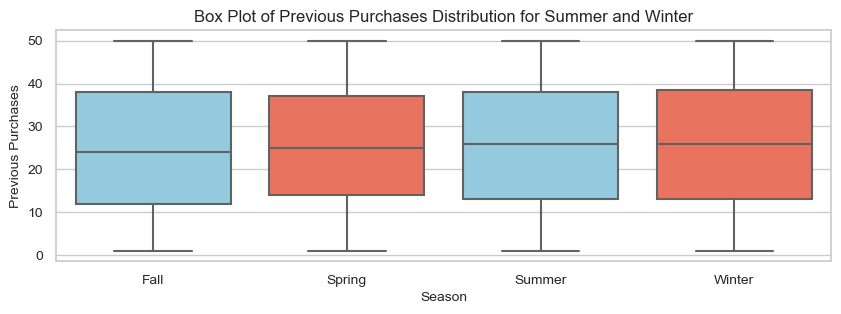

Analysis for Previous Purchases between Summer and Spring:
T-statistic: 0.448
P-value: 0.654
There is not enough evidence to claim that the means are different.

----------------------------------------------



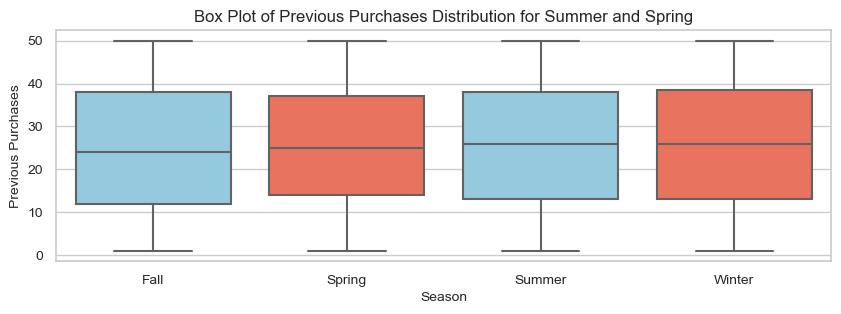

Analysis for Previous Purchases between Summer and Fall:
T-statistic: 0.659
P-value: 0.510
There is not enough evidence to claim that the means are different.

----------------------------------------------



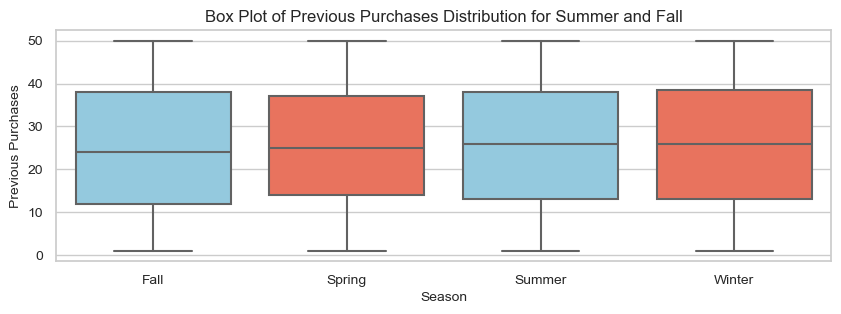

Analysis for Previous Purchases between Winter and Summer:
T-statistic: 0.773
P-value: 0.440
There is not enough evidence to claim that the means are different.

----------------------------------------------



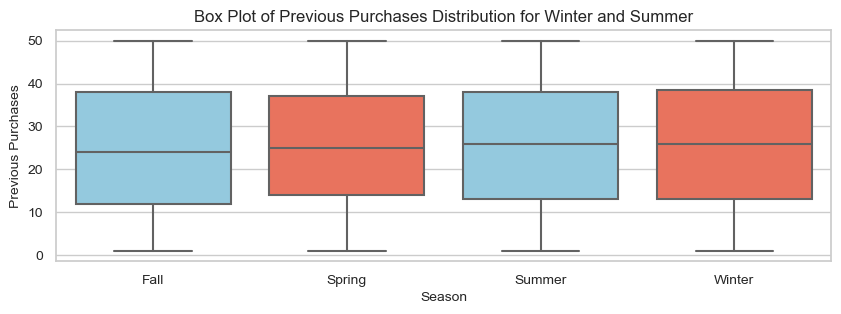

Analysis for Previous Purchases between Winter and Spring:
T-statistic: 1.248
P-value: 0.212
There is not enough evidence to claim that the means are different.

----------------------------------------------



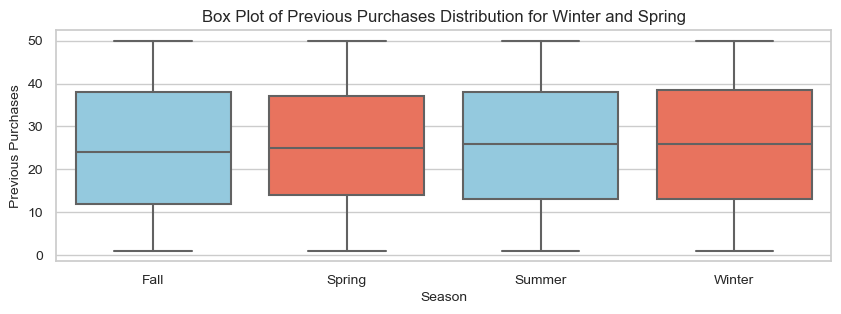

Analysis for Previous Purchases between Winter and Fall:
T-statistic: 1.448
P-value: 0.148
There is not enough evidence to claim that the means are different.

----------------------------------------------



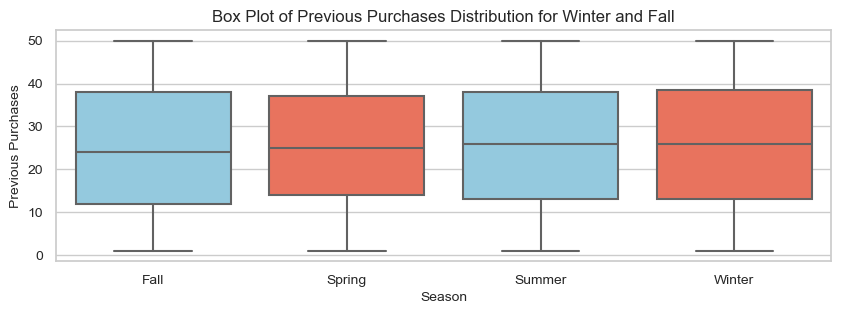

Analysis for Previous Purchases between Spring and Summer:
T-statistic: -0.448
P-value: 0.654
There is not enough evidence to claim that the means are different.

----------------------------------------------



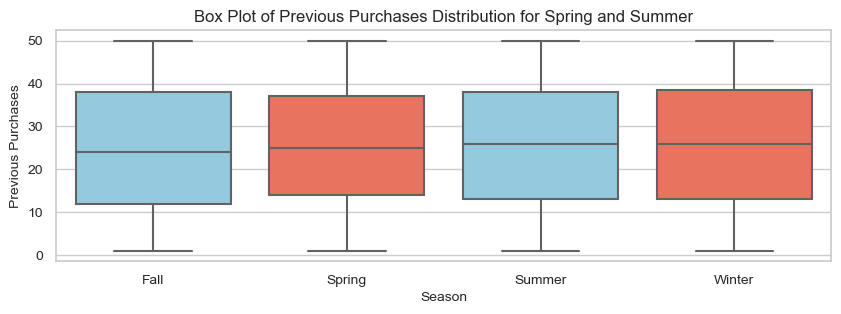

Analysis for Previous Purchases between Spring and Winter:
T-statistic: -1.248
P-value: 0.212
There is not enough evidence to claim that the means are different.

----------------------------------------------



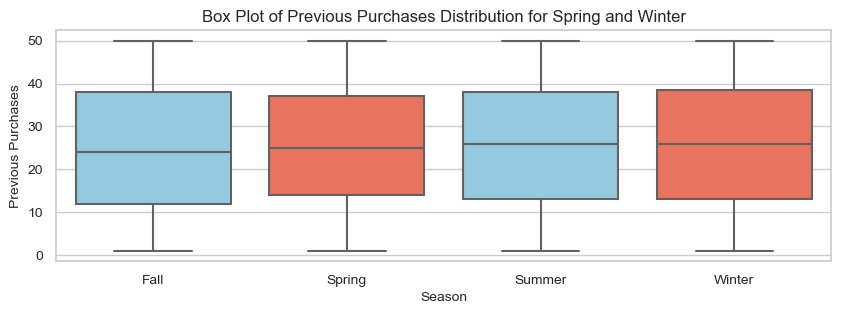

Analysis for Previous Purchases between Spring and Fall:
T-statistic: 0.226
P-value: 0.822
There is not enough evidence to claim that the means are different.

----------------------------------------------



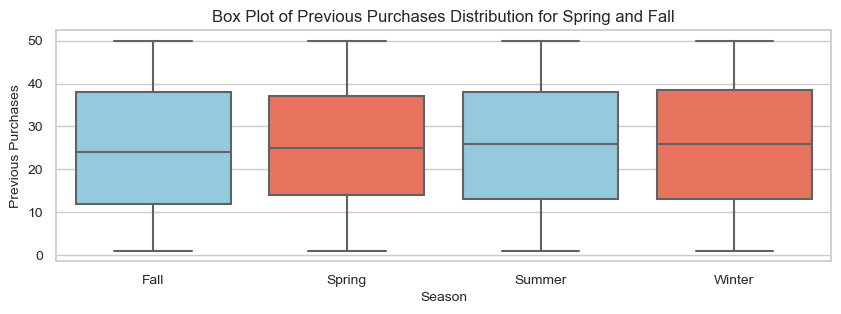

Analysis for Previous Purchases between Fall and Summer:
T-statistic: -0.659
P-value: 0.510
There is not enough evidence to claim that the means are different.

----------------------------------------------



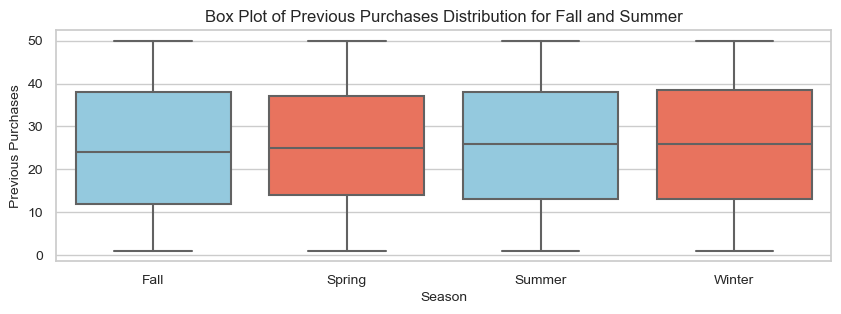

Analysis for Previous Purchases between Fall and Winter:
T-statistic: -1.448
P-value: 0.148
There is not enough evidence to claim that the means are different.

----------------------------------------------



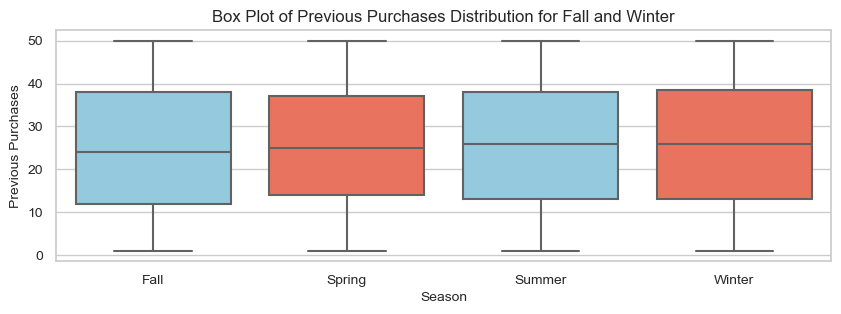

Analysis for Previous Purchases between Fall and Spring:
T-statistic: -0.226
P-value: 0.822
There is not enough evidence to claim that the means are different.

----------------------------------------------



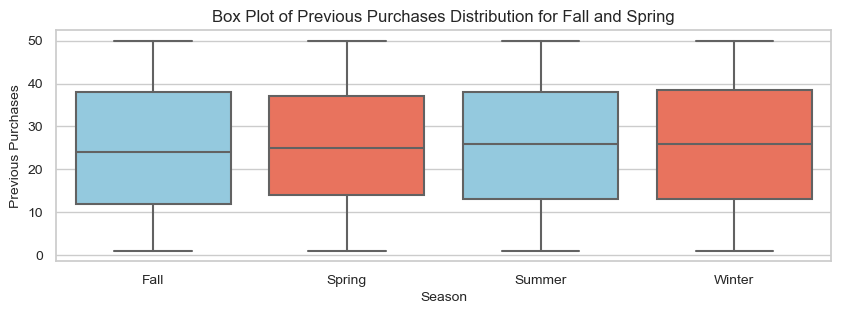

In [207]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to analyze from your shopping_trends_df dataset
variables = ['Purchase Amount (USD)', 'Previous Purchases']  

seasons = ['Summer', 'Winter', 'Spring', 'Fall']  

for variable in variables:
    for season in seasons:
        # Split the data into different groups based on seasons
        data_group = shopping_trends_df[shopping_trends_df['Season'] == season][variable].dropna()

        # Perform the independent t-test for each season against others
        for other_season in seasons:
            if other_season != season:
                other_data_group = shopping_trends_df[shopping_trends_df['Season'] == other_season][variable].dropna()

                t_statistic, p_value = stats.ttest_ind(data_group, other_data_group, equal_var=False)

                # Display the results
                print(f"Analysis for {variable} between {season} and {other_season}:")
                print(f"T-statistic: {t_statistic:.3f}")
                print(f"P-value: {p_value:.3f}")

                # Interpretation
                if p_value < 0.05:
                    print("There is a statistically significant difference in the means.")
                else:
                    print("There is not enough evidence to claim that the means are different.")
                print("\n----------------------------------------------\n")
                
                # Visualize Box plots for each variable and season comparison
                plt.figure(figsize=(10, 3))
                sns.set(style="whitegrid")
                sns.boxplot(x='Season', y=variable, data=shopping_trends_df, palette=['#87CEEB', '#FF6347'])
                plt.title(f'Box Plot of {variable} Distribution for {season} and {other_season}', fontsize=12)
                plt.xlabel('Season', fontsize=10)
                plt.ylabel(variable, fontsize=10)
                plt.xticks(fontsize=10)
                plt.yticks(fontsize=10)
                plt.show()


## Hypothesis 4 | Subscription Status and Purchase Behavior

Investigate if customers with a subscription status tend to make more frequent purchases or spend more compared to non-subscribers.

In [209]:
# View unique values in the 'Frequency of Purchases' column
unique_values = shopping_trends_df['Frequency of Purchases'].unique()

unique_values


['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly', 'Monthly', 'Every 3 Months']
Categories (7, object): ['Annually', 'Bi-Weekly', 'Every 3 Months', 'Fortnightly', 'Monthly', 'Quarterly', 'Weekly']

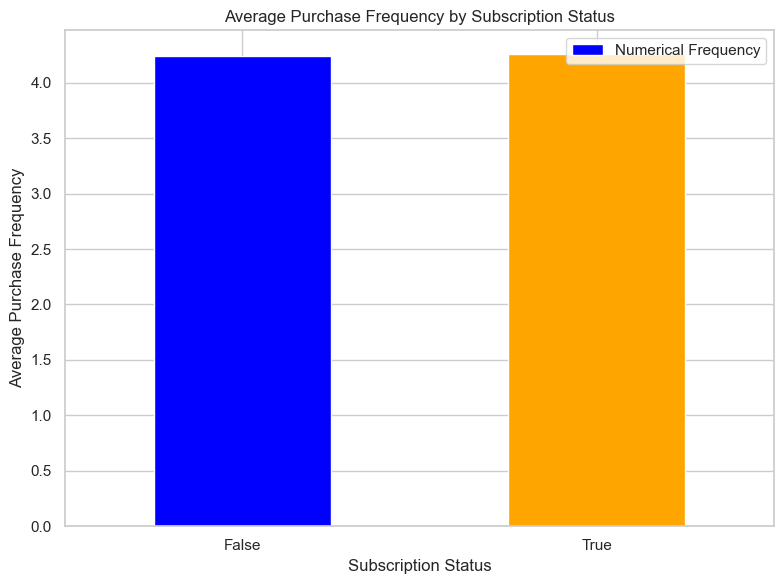

T-Statistic: nan
P-Value: nan


In [215]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


# Mapping values to numerical representations
frequency_mapping = {
    'Fortnightly': 5,
    'Weekly': 6,
    'Annually': 2,
    'Quarterly': 3,
    'Bi-Weekly': 7,
    'Monthly': 4,
    'Every 3 Months': 3
}

# Assigning numerical values based on the mapping
shopping_trends_df['Numerical Frequency'] = shopping_trends_df['Frequency of Purchases'].map(frequency_mapping)

# Convert 'Numerical Frequency' column to numeric dtype
shopping_trends_df['Numerical Frequency'] = pd.to_numeric(shopping_trends_df['Numerical Frequency'])

# Grouping data by 'Subscription Status'
grouped_data = shopping_trends_df.groupby('Subscription Status')

# Calculate metrics: average purchase frequency and average purchase amount
average_purchase_frequency = grouped_data['Numerical Frequency'].mean()
average_purchase_amount = grouped_data['Purchase Amount (USD)'].mean()

# Statistical comparison - Example t-test for purchase frequency
subscribers = shopping_trends_df[shopping_trends_df['Subscription Status'] == 'Subscriber']['Numerical Frequency']
non_subscribers = shopping_trends_df[shopping_trends_df['Subscription Status'] == 'Non-Subscriber']['Numerical Frequency']
t_statistic, p_value = stats.ttest_ind(subscribers, non_subscribers, equal_var=False)

# Visualization - Example: Bar plot comparing average purchase frequency
plt.figure(figsize=(8, 6))
average_purchase_frequency.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Purchase Frequency by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Average Purchase Frequency')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

# Print statistical test results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")





The graph illustrates the average purchase frequency across two groups: subscribers and non-subscribers. Interestingly, there seems to be no significant difference in the average purchase frequency between these groups. Both subscriber and non-subscriber segments exhibit similar buying frequencies, indicating that subscription status may not strongly influence the frequency of purchases in our dataset.

In [218]:
# Segment customers based on demographics (e.g., age groups)
# Analyzing purchase behavior for each segment concerning subscription status
age_groups = shopping_trends_df.groupby(['Age', 'Subscription Status'])
purchase_behavior = age_groups['Purchase Amount (USD)'].mean()
purchase_behavior

Age  Subscription Status
18   False                  62.072727
     True                   51.785714
19   False                  61.568966
     True                   59.565217
20   False                  55.795455
                              ...    
68   True                   47.933333
69   False                  62.119403
     True                   62.952381
70   False                  57.652174
     True                   55.142857
Name: Purchase Amount (USD), Length: 106, dtype: float64

In [223]:
# Create age bins
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-30', '30-40', '40-50', '50-60', '60-70']
shopping_trends_df['Age Group'] = pd.cut(shopping_trends_df['Age'], bins=bins, labels=labels, right=False)



In [224]:
age_groups = shopping_trends_df.groupby(['Age Group', 'Subscription Status'])
purchase_behavior = age_groups['Purchase Amount (USD)'].mean().unstack()


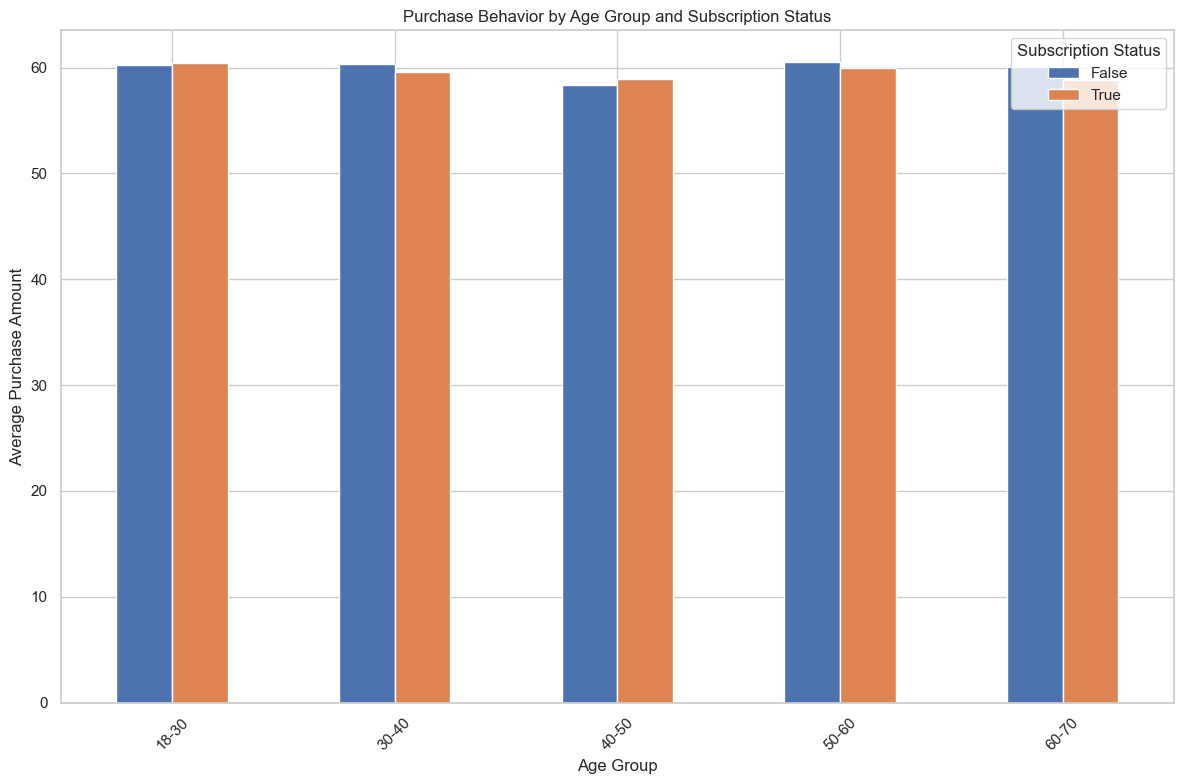

In [225]:
purchase_behavior.plot(kind='bar', figsize=(12, 8))
plt.title('Purchase Behavior by Age Group and Subscription Status')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)
plt.legend(title='Subscription Status')
plt.tight_layout()
plt.show()


The bar chart illustrates the comparison of average purchase behavior among different age groups categorized by subscription status. It reveals that for individuals aged between 18-30 and 40-50, those with subscriptions tend to exhibit slightly higher purchase amounts compared to their non-subscribed counterparts. Conversely, individuals aged between 30-40, 50-60, and 60-70 with subscriptions tend to display lower purchase amounts compared to those without a subscription. Overall, the purchase behavior by age group and subscription status appears to vary only slightly, with specific age brackets showing nuanced differences in purchasing patterns.

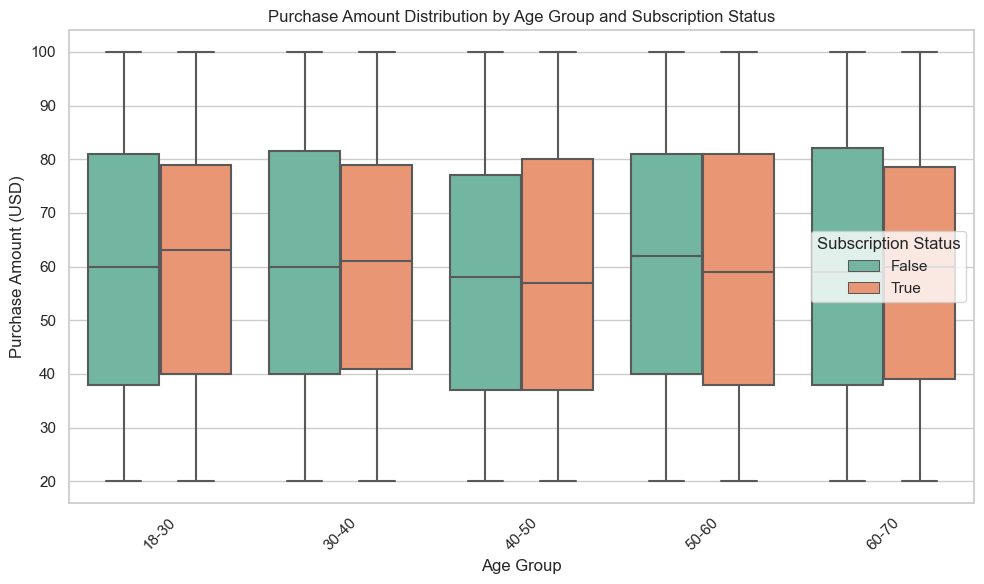

In [229]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Purchase Amount (USD)', hue='Subscription Status', data=shopping_trends_df, palette='Set2')
plt.title('Purchase Amount Distribution by Age Group and Subscription Status')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Subscription Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The box plot illustrates distinct purchasing patterns across age groups and subscription status. Individuals aged 18-30 and 30-40, lacking subscriptions, exhibit slightly lower average purchase amounts compared to their subscribed counterparts. Conversely, those aged 40-50 and 50-60 without subscriptions display slightly higher mean purchase amounts than those with subscriptions. This visualization emphasizes contrasting spending behaviors within specific age brackets, highlighting the influence of subscription status on purchase amounts across different age ranges.

In [230]:
from scipy.stats import ttest_ind

# Example: comparing purchase amounts between subscribers and non-subscribers
subscribers_purchase = shopping_trends_df[shopping_trends_df['Subscription Status'] == 'Subscriber']['Purchase Amount (USD)']
non_subscribers_purchase = shopping_trends_df[shopping_trends_df['Subscription Status'] == 'Non-Subscriber']['Purchase Amount (USD)']

# Perform t-test
t_statistic, p_value = ttest_ind(subscribers_purchase, non_subscribers_purchase, equal_var=False)

# Compare p-value to significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis")
    print("There is a significant difference in purchase behavior between subscribers and non-subscribers.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in purchase behavior between subscribers and non-subscribers.")


Fail to reject the null hypothesis
There is no significant difference in purchase behavior between subscribers and non-subscribers.


After conducting the statistical analysis, the results indicate that there is no significant difference in purchase behavior observed between subscribers and non-subscribers. Therefore, we fail to reject the null hypothesis, suggesting that subscription status does not influence the purchase behavior significantly.

## Analyzing Trends in Additional Variables

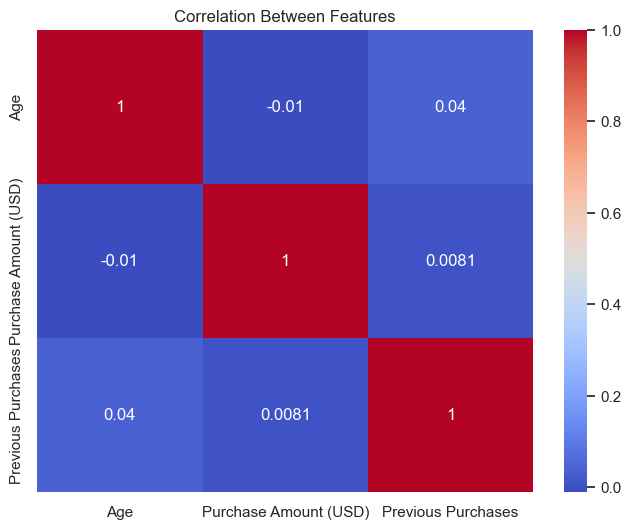

In [208]:
# Selecting the specified numerical columns
numerical_columns = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']
selected_data = shopping_trends_df[numerical_columns]

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if 'ID' in shopping_trends_df.columns:
    shopping_trends_df_no_id = shopping_trends_df.drop('ID', axis=1)
else:
    shopping_trends_df_no_id = shopping_trends_df.copy()

plt.figure(figsize=(8, 6)) 
plt.title('Correlation Between Features')
sns.heatmap(shopping_trends_df_no_id.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.show()


 The correlation coefficient between Age and Purchase Amount (USD) is approximately -0.01. The correlation coefficient between Age and Previous Purchases is around 0.04. The correlation coefficient between Purchase Amount (USD) and Previous Purchases is approximately 0.008. Overall, based on the correlation matrix, it seems that there are no strong linear relationships between these variables.

## Conclusion:

Customer Shopping Trends in the U.S. - Hypotheses Analysis:
1. Gender and Purchase Behavior:
Investigated whether gender significantly impacts purchase behavior.

2. Seasonal Influence on Purchase Behavior:
Explored the relationship between seasons and purchase behavior.

3. Subscription Status and Purchase Behavior:
Analyzed if customers with subscription status exhibit different purchase behavior compared to non-subscribers.

4. Age Groups and Purchase Behavior:
Examined the correlation between age groups and purchase behavior.

Upon comprehensive analysis, none of the hypotheses provided substantial evidence to reject the null hypothesis. The data across all four hypotheses lacked significant correlation or evidence, indicating that the factors investigated—gender, season, subscription status, or age groups—didn’t exhibit strong associations with purchase behavior. Further exploration or consideration of other variables might be needed to understand customer spending patterns beyond those tested in this analysis. Additionally, a larger sample size may help establish a pattern to deduce customer shopping trends in the U.S more accurately.



## Business Recommendations

Based on the conclusion drawn from the hypotheses analysis, here are some business recommendations:

Leverage Qualitative Insights: Integrate qualitative methods like surveys, focus groups, or feedback mechanisms to supplement quantitative data. Understanding customer sentiments, preferences, and pain points could enrich the analysis and unearth behavioral aspects not captured solely by quantitative data.

Customer Engagement Initiatives: While no significant correlations were found, it's essential to focus on customer engagement and satisfaction. Implement strategies like personalized recommendations, loyalty programs, or user-centric experiences to strengthen customer relationships irrespective of the observed correlations.

Continuous Monitoring and Flexibility: Keep monitoring trends and remain flexible in strategies. Market dynamics evolve, and being adaptable to changing customer behaviors is crucial for sustained success.

By adopting these recommendations, Sapphire can potentially uncover deeper insights into customer behavior and tailor strategies that resonate more effectively with their target audience, driving sustainable growth and customer satisfaction.





